#### Rafał Gąsior 407326

### Overfitting - regularization

#### L2 and L1 regularization for linear estimators

In [144]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

In [145]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


* Analyse the dataset: 

In [146]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* Assign data to X and y variables:

In [147]:
X = boston.data
y = boston.target

#### Ex.1. Split train-test dataset

* 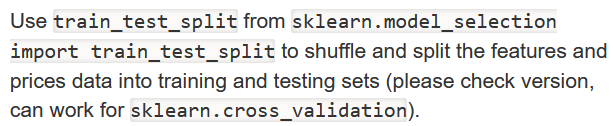

In [148]:
from sklearn.model_selection import train_test_split
#sklearn.cross_validation

* Split the data into 80% training and 20% testing
* Set the random_state for train_test_split to a value of your choice

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

* Check solution

In [150]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


#### Ex.2. Linear regression

* Import the Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression

* Fit a model based on X_train and Y_train

In [152]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7455344405641733

* Predict the X_test and store the prediction values into Y_pred

In [153]:
Y_pred = reg.predict(X_test)

* To visualize the differences between actual prices and predicted values create a scatter plot:

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

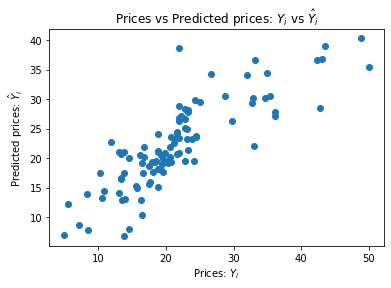

In [154]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### Ex.3. To check the level of error of a model calculate the Mean Squared Error.

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
MSE = mean_squared_error(y_test, Y_pred)
print('Mean square error: ', MSE)

Mean square error:  23.81224546508062


#### Ex.4. Calculate the model.score. Check what it is for linear problems.

In [157]:
test = reg.score(X_test, y_test)
train = reg.score(X_train, y_train)
print("Test score: ", test)
print("Train score: ", train)

Test score:  0.6920749038652151
Train score:  0.7455344405641733


* Normalize the data using StandardScaler()
* Generate polynomial features (2nd degree polynomial)
*  Fit and predict a new Linear model with the polynomial features
* Calculate the MSE and model score - compare with regular Linear Regression.


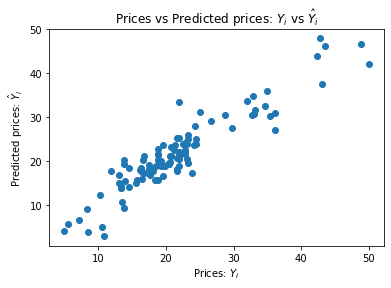

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
scaler = StandardScaler()


X_train_fit = polynomial_features.fit_transform(X_train, y_train)
X_test_fit = polynomial_features.fit_transform(X_test, y_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_fit, y_train)
y_pred_fit = lin_reg.predict(X_test_fit)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_fit)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [159]:
MSE = mean_squared_error(y_test, y_pred_fit)
test = lin_reg.score(X_test_fit, y_test)
train = lin_reg.score(X_train_fit, y_train)
print('Mean square error: ', MSE)
print("Test score: ", test)
print("Train score: ", train)

Mean square error:  10.418718228898864
Test score:  0.8652716386222563
Train score:  0.9325110031499102


#### Ex.5. Lasso Regression

* Please train the model by manipulating the α parameter in the range of 0.001 - 10 (for several values). 
* Please draw a graph of MSE from α and model.score from α

In [160]:
from sklearn.linear_model import Ridge, Lasso

In [161]:
clf = Lasso(alpha=0.05)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

MSE_lasso = mean_squared_error(y_test, clf_y_pred)
test_lasso = clf.score(X_test, y_test)
train_lasso = clf.score(X_train, y_train)
print('Mean square error: ', MSE_lasso)
print("Test score: ", test_lasso)
print("Train score: ", train_lasso)

Mean square error:  22.790464500466673
Test score:  0.705287937563311
Train score:  0.7351984203859041


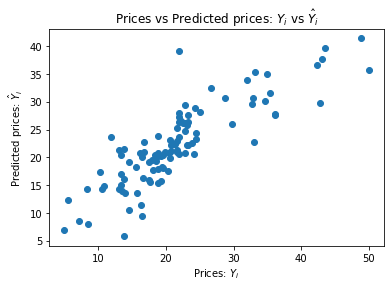

In [162]:
plt.scatter(y_test, clf_y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

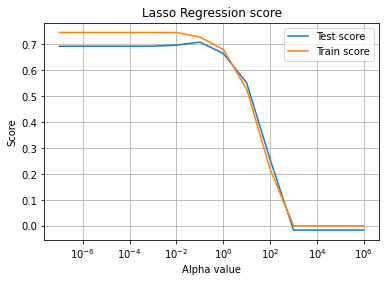

In [163]:
alfa = [10**i for i in range(-7, 7)]   #(0.0000001, 10000000)
test_score = []
train_score = []

for i in alfa:
    clf = Lasso(alpha=i)
    clf.fit(X_train, y_train)
    test_score.append(clf.score(X_test, y_test))
    train_score.append(clf.score(X_train, y_train))
    
plt.plot(alfa, test_score, label = "Test score")
plt.plot(alfa, train_score, label = "Train score")
plt.xscale('log')
plt.legend()
plt.title("Lasso Regression score")
plt.xlabel("Alpha value")
plt.ylabel("Score")
plt.grid()
plt.show()

#### Ex.6. Ridge Regression

* Please train the model by manipulating the α parameter in the range of 0.001 - 10 (for several values). 
* Please draw a graph of MSE from α and model.score from α

In [164]:
clf_Ridge = Ridge(alpha=0.05)
clf_Ridge.fit(X_train, y_train)
clf_Ri_y_pred = clf_Ridge.predict(X_test)

MSE_Ridge = mean_squared_error(y_test, clf_Ri_y_pred)
test_Ridge = clf_Ridge.score(X_test, y_test)
train_Ridge = clf_Ridge.score(X_train, y_train)
print('Mean square error: ', MSE_Ridge)
print("Test score: ", test_Ridge)
print("Train score: ", train_Ridge)

Mean square error:  23.74177245501845
Test score:  0.6929862168461821
Train score:  0.7455114267615899


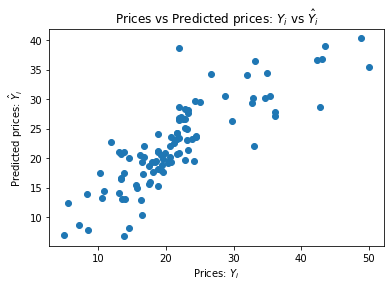

In [165]:
plt.scatter(y_test, clf_Ri_y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

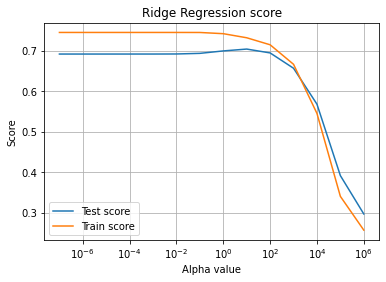

In [166]:
alfa = [10**i for i in range(-7, 7)]   #(0.0000001, 10000000)
test_score = []
train_score = []

for i in alfa:
    clf_Ridge = Ridge(alpha=i)
    clf_Ridge.fit(X_train, y_train)
    test_score.append(clf_Ridge.score(X_test, y_test))
    train_score.append(clf_Ridge.score(X_train, y_train))
    
plt.plot(alfa, test_score, label = "Test score")
plt.plot(alfa, train_score, label = "Train score")
plt.xscale('log')
plt.legend()
plt.title("Ridge Regression score")
plt.xlabel("Alpha value")
plt.ylabel("Score")
plt.grid()
plt.show()

### Regulization for Logistic Regression

#### Datasheet A

In [167]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data= np.c_[data['data']], columns = data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [168]:
y = data.target
X = data.data

* Divide the set into a training part and a test part

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [170]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='liblinear', max_iter=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
test_score = reg.score(X_test, y_test)
train_score = reg.score(X_train, y_train)
print('Mean square error: ', MSE)
print("Test score: ", test_score)
print("Train score: ", train_score)

Mean square error:  0.10526315789473684
Test score:  0.8947368421052632
Train score:  0.9692307692307692


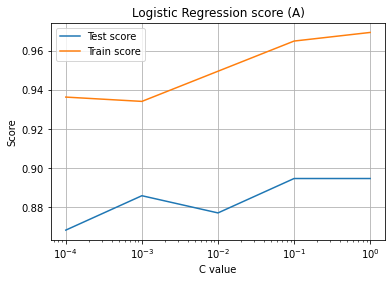

In [171]:
C = [10**i for i in range(-4, 1)]   #(0.0001, 1)
test_score = []
train_score = []

for i in C:
    reg = LogisticRegression(penalty='l2', tol=0.0001, C=i, solver='liblinear', max_iter=500)
    reg.fit(X_train, y_train)
    test_score.append(reg.score(X_test, y_test))
    train_score.append(reg.score(X_train, y_train))
    
plt.plot(C, test_score, label = "Test score")
plt.plot(C, train_score, label = "Train score")
plt.xscale('log')
plt.legend()
plt.title("Logistic Regression score (A)")
plt.xlabel("C value")
plt.ylabel("Score")
plt.grid()
plt.show()

#### Datasheet B

In [172]:
path = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
dataset = pd.read_csv(path, na_values='?', dtype={'ID': str})
dataset.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [173]:
dataset

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


* Replace the values of nan with the average value, for a given feature (e.g. using the pandas.isnull() function)

In [174]:
pd.isnull(dataset).values.any()

True

In [175]:
mean_value = dataset.mean()
mean_value

ID                                  inf
Clump Thickness                4.417740
Uniformity of Cell Size        3.134478
Uniformity of Cell Shape       3.207439
Marginal Adhesion              2.806867
Single Epithelial Cell Size    3.216023
Bare Nuclei                    3.544656
Bland Chromatin                3.437768
Normal Nucleoli                2.866953
Mitoses                        1.589413
dtype: float64

In [176]:
dataset.fillna(mean_value, inplace=True)
pd.isnull(dataset).values.any()

False

* Divide the set into a training and test part. Please remember to remove the first column that represents the example ID and convert the output vector (y) from the text values to the corresponding 0 or 1 values.

In [177]:
X = dataset.drop(['ID', 'Class'], axis=1)
y = dataset.iloc[:, -1]
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

* Using the implementation of logistic regression with L2 regularization from scikit-learn, please train several models with the alpha parameter in the range [0.0001; 10]. For each of the models, please count the accuracy on the test set.

In [179]:
reg = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='liblinear', max_iter=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

test_score = reg.score(X_test, y_test)
train_score = reg.score(X_train, y_train)

print("Test score: ", test_score)
print("Train score: ", train_score)

Test score:  0.9642857142857143
Train score:  0.9660107334525939


* Draw an alpha graph from accuracy for each trained model.

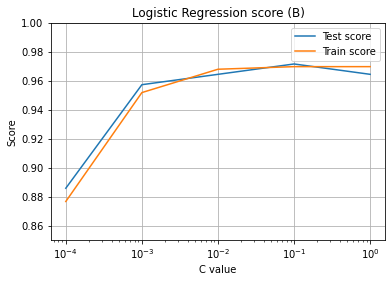

In [180]:
C = [10**i for i in range(-4, 1)]   #(0.0001, 1)
test_score = []
train_score = []

for i in C:
    reg = LogisticRegression(penalty='l2', C=i, max_iter=2500)
    reg.fit(X_train, y_train)
    test_score.append(reg.score(X_test, y_test))
    train_score.append(reg.score(X_train, y_train))
    
plt.plot(C, test_score, label = "Test score")
plt.plot(C, train_score, label = "Train score")
plt.xscale('log')
plt.legend()
plt.title("Logistic Regression score (B)")
plt.xlabel("C value")
plt.ylabel("Score")
plt.ylim((0.85,1))
plt.grid()
plt.show()